In [1]:
import os

os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/michael_dev/RA2_alpine_lads/ra_joint_predictions')

In [2]:
from utils.config import Config

config = Config()

In [5]:
from dataset.test_dataset import joint_test_dataset

val_dataset = joint_test_dataset(config, config.train_fixed_location)

tf_val_dataset, no_samples = val_dataset.get_hands_joint_test_dataset()

val_dataset_v2 = joint_test_dataset(config, config.train_fixed_location, joint_scale = 6, pad_resize = False)

tf_val_dataset_v2, no_samples = val_dataset_v2.get_hands_joint_test_dataset(joints_source = './data/predictions/hand_joint_data_test_v2.csv')

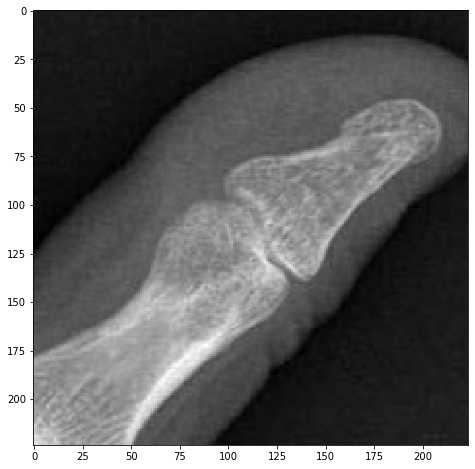

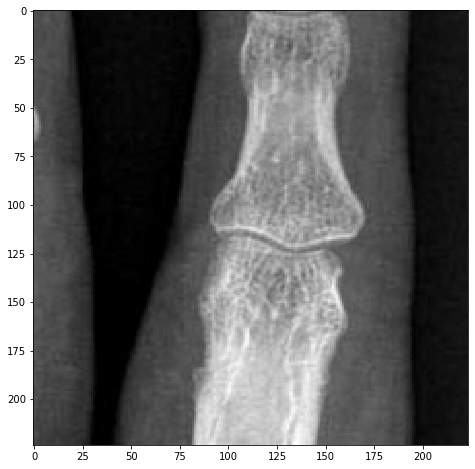

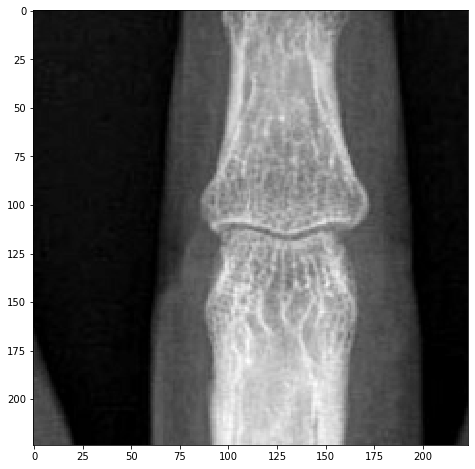

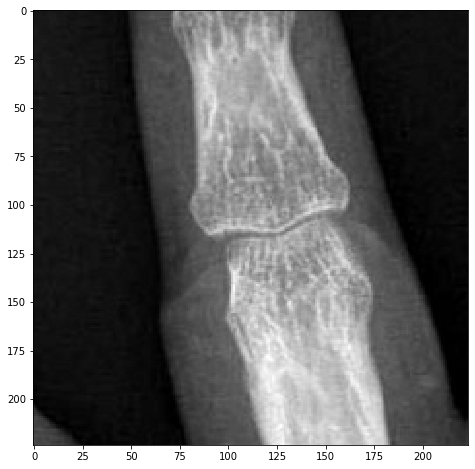

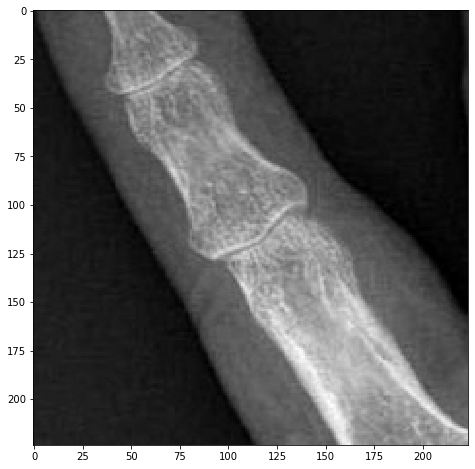

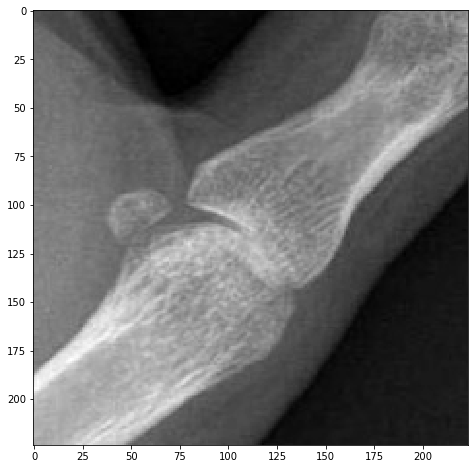

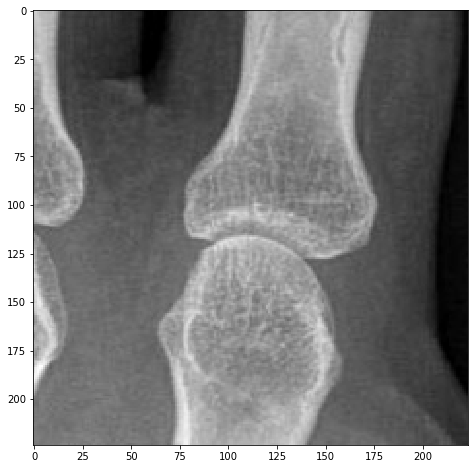

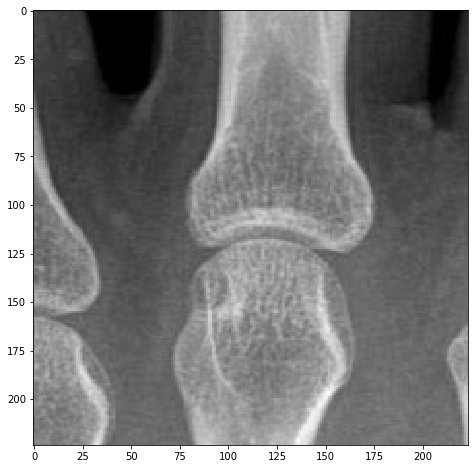

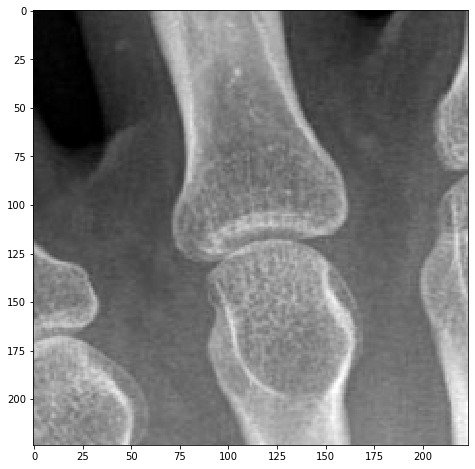

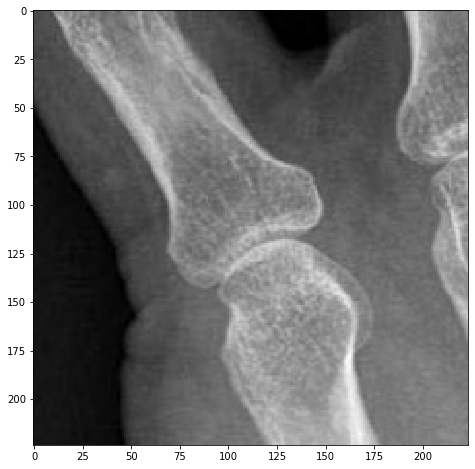

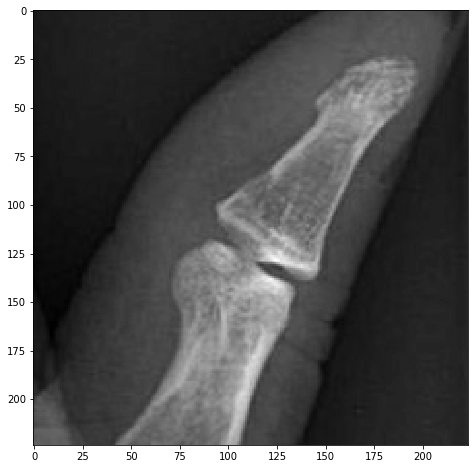

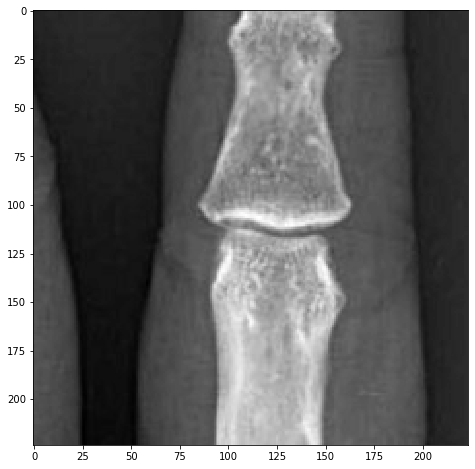

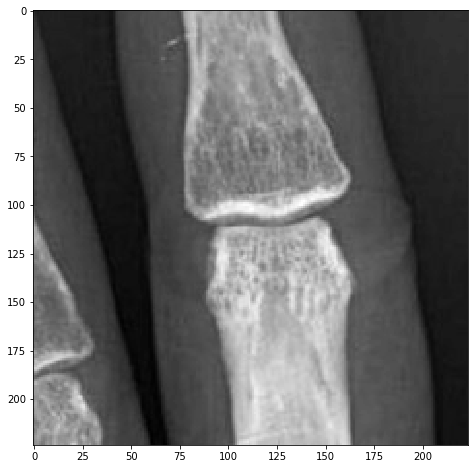

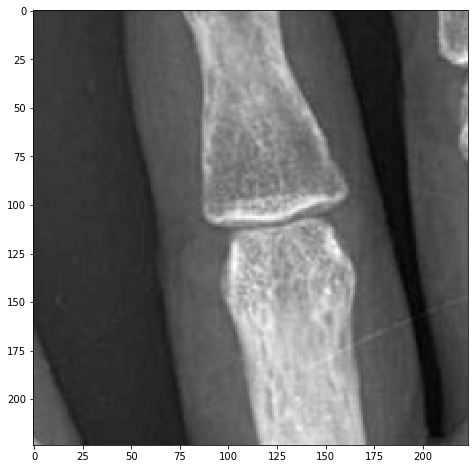

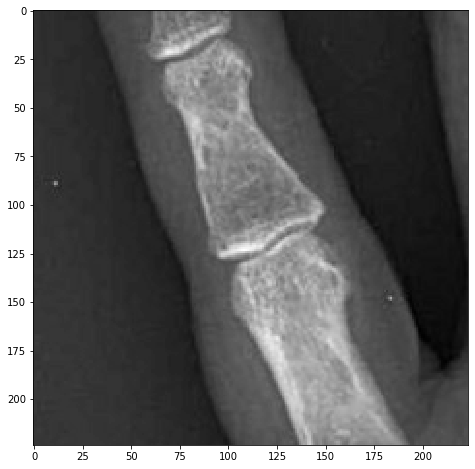

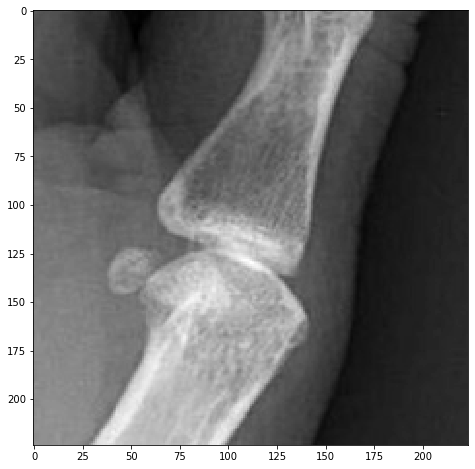

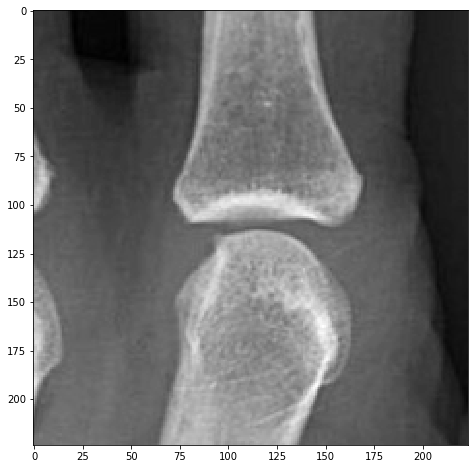

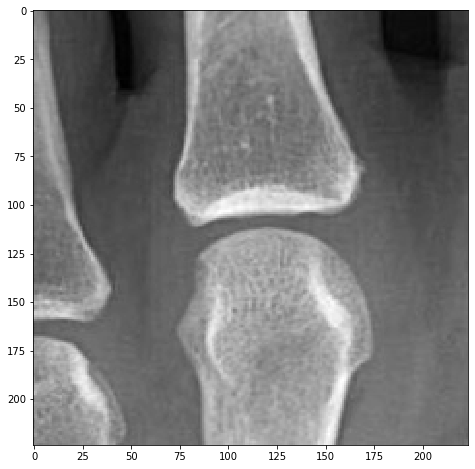

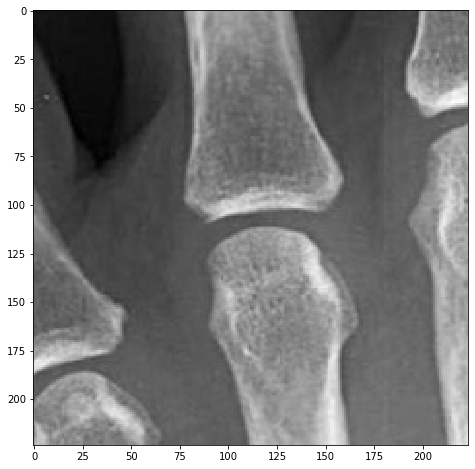

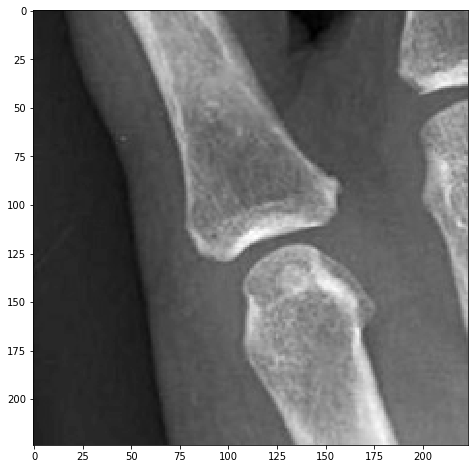

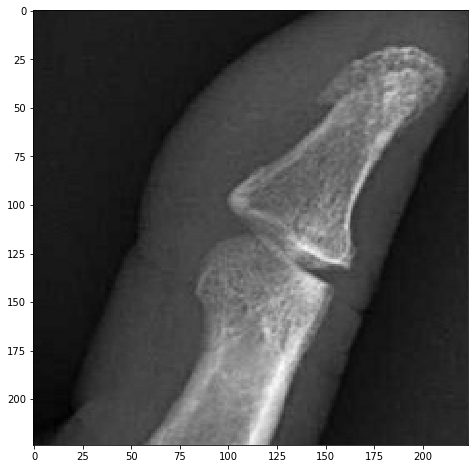

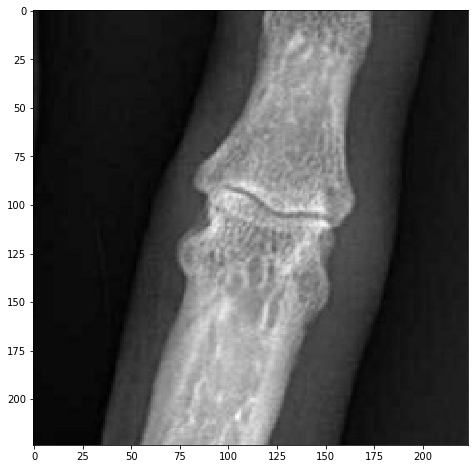

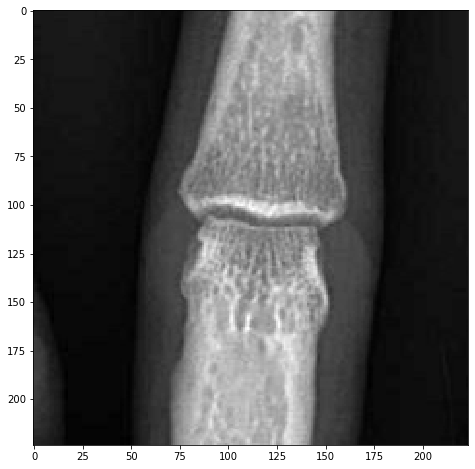

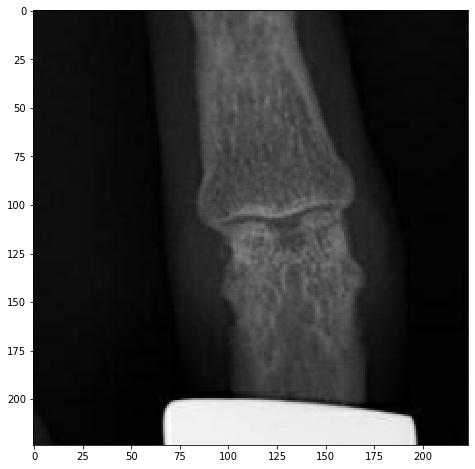

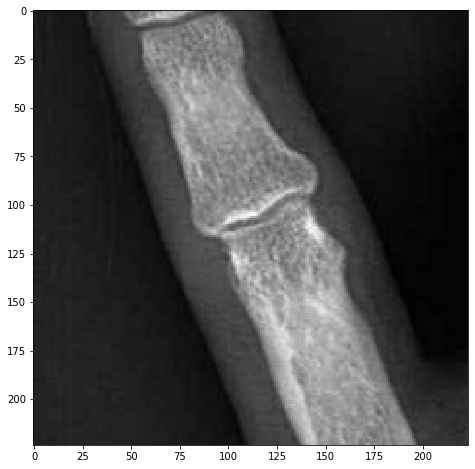

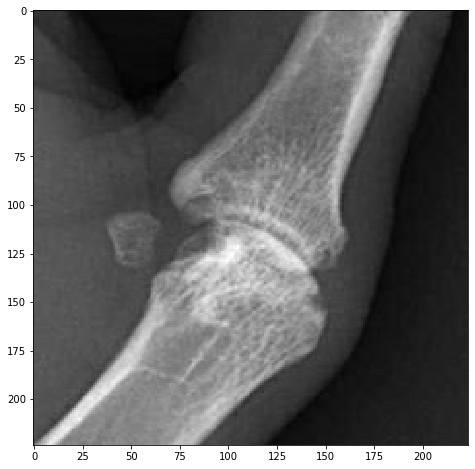

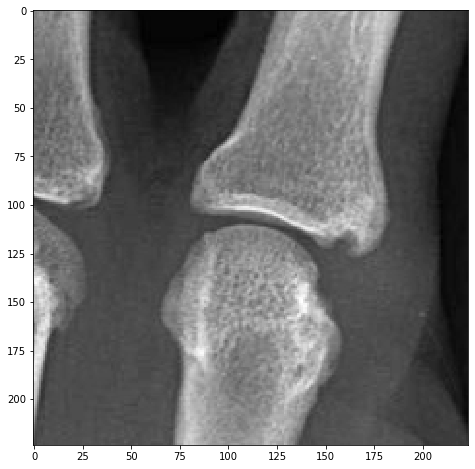

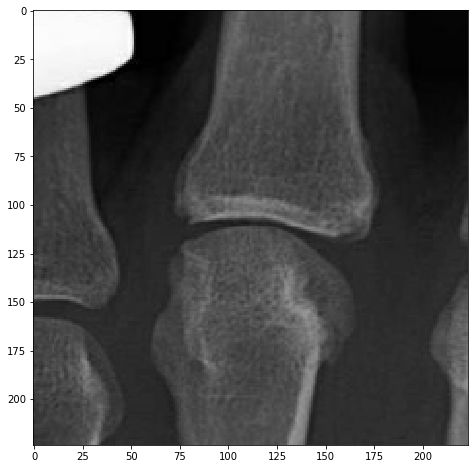

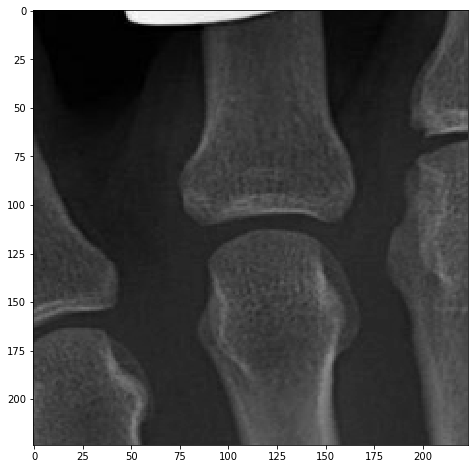

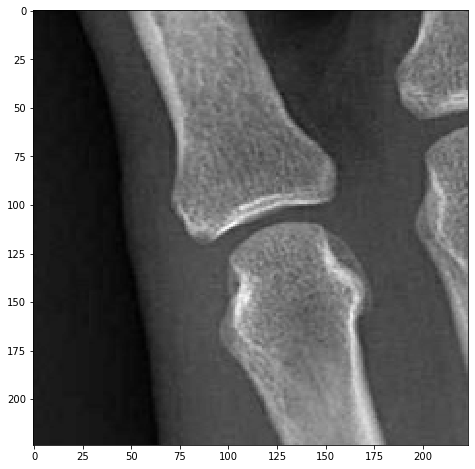

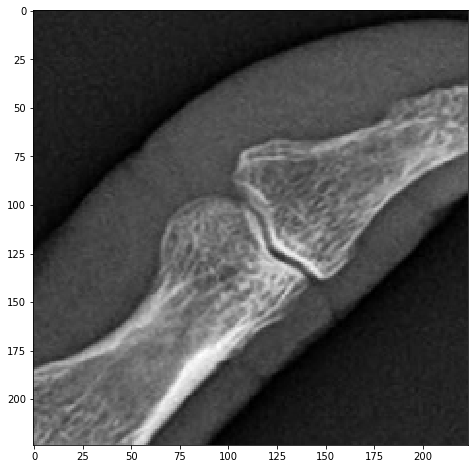

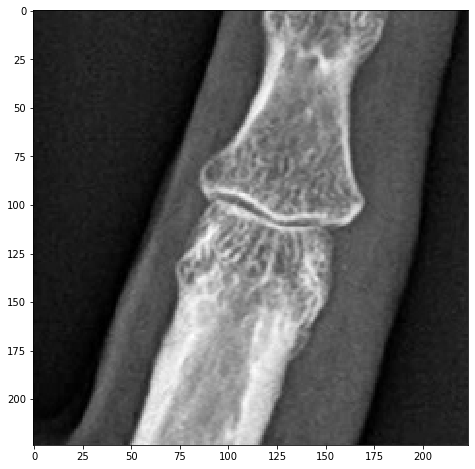

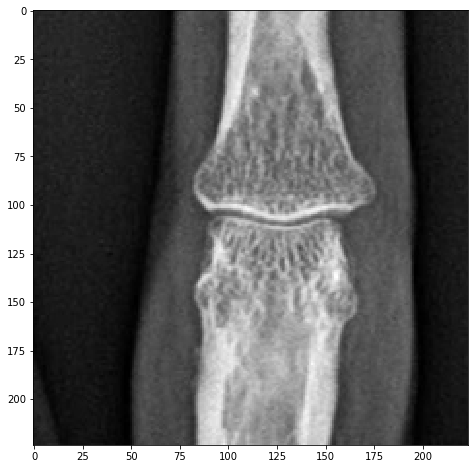

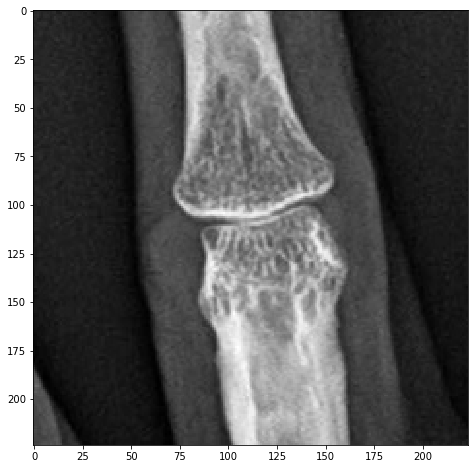

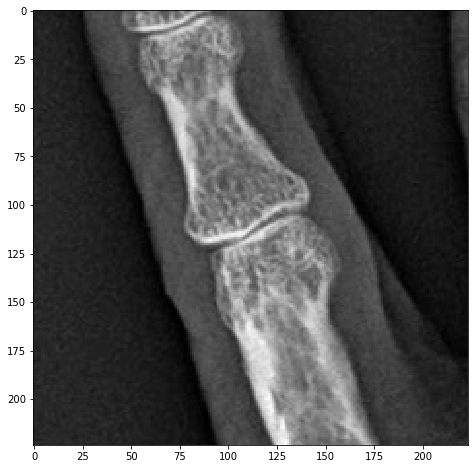

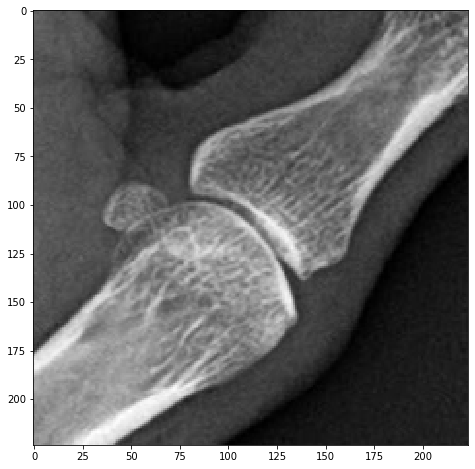

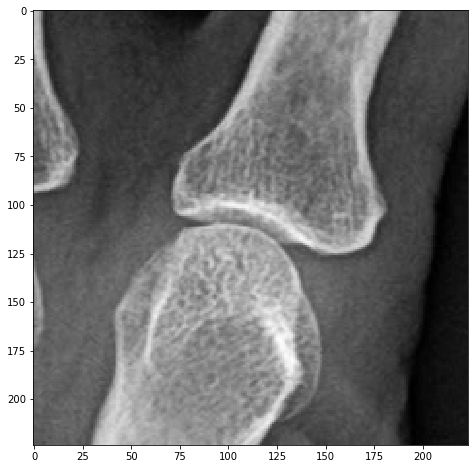

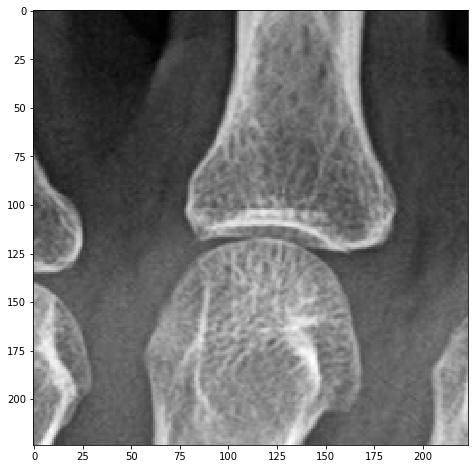

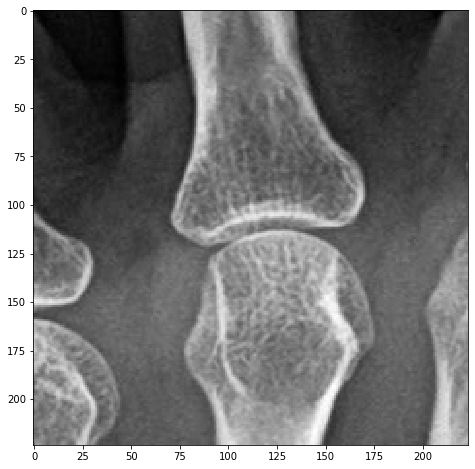

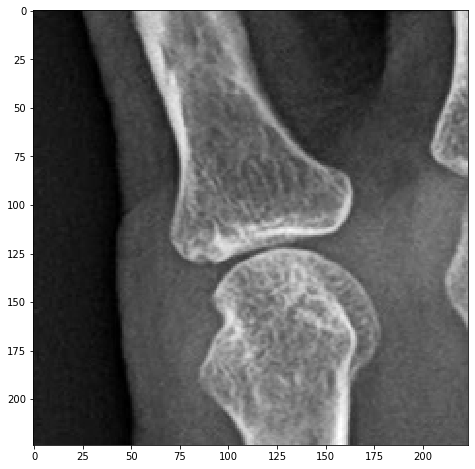

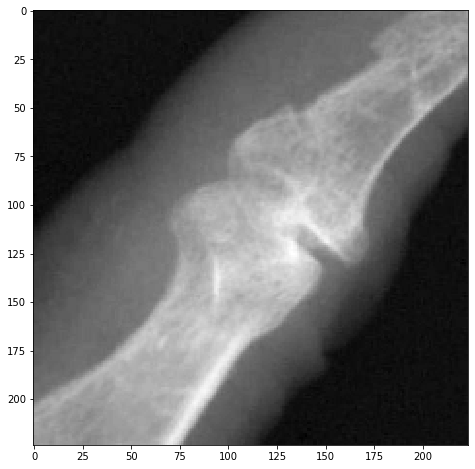

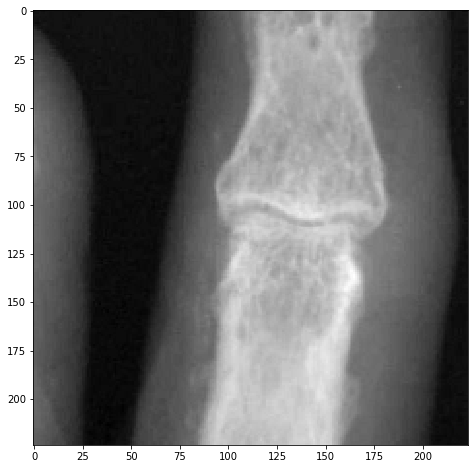

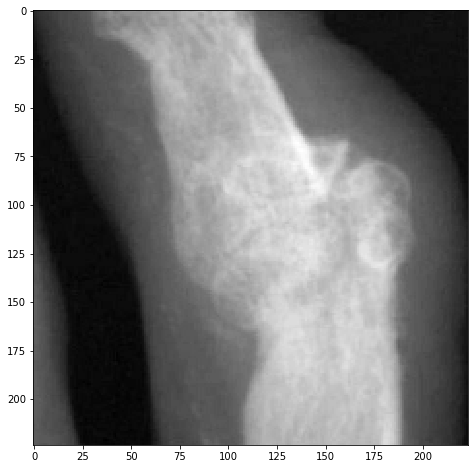

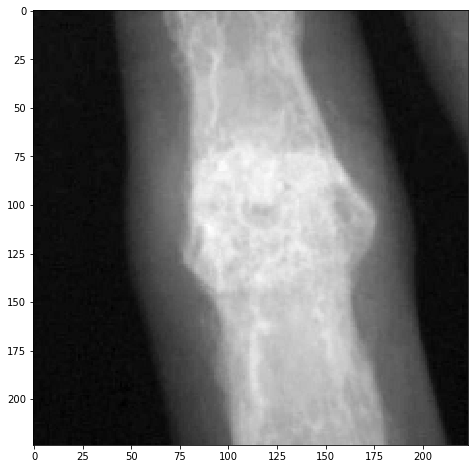

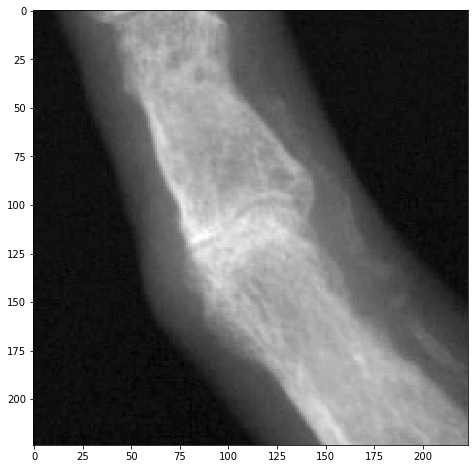

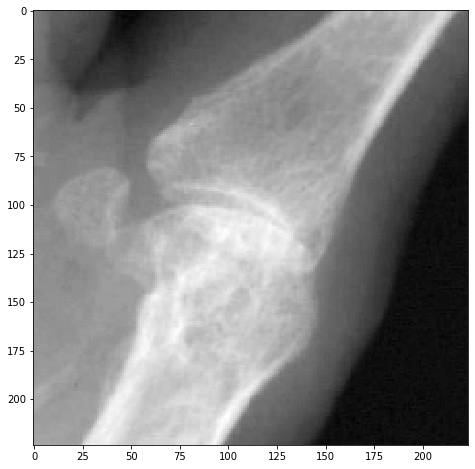

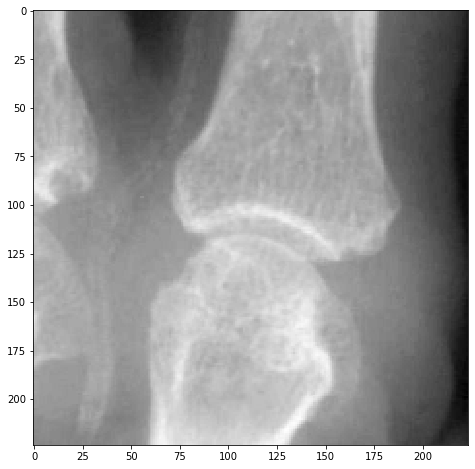

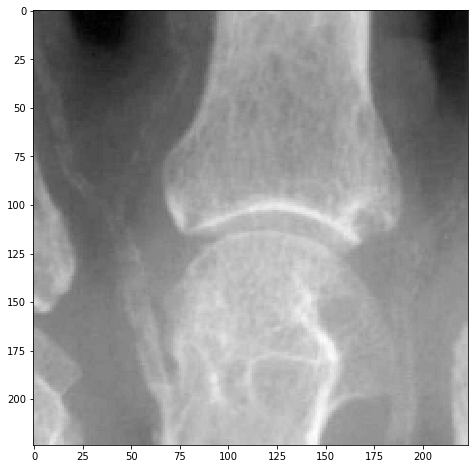

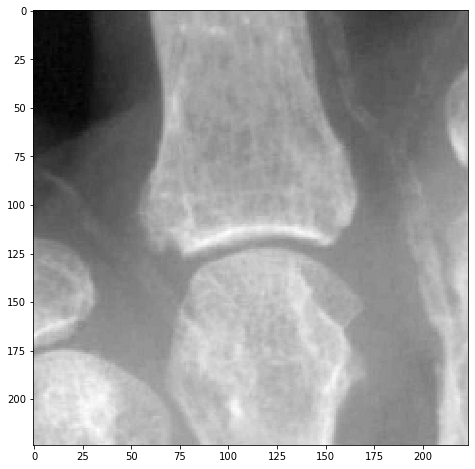

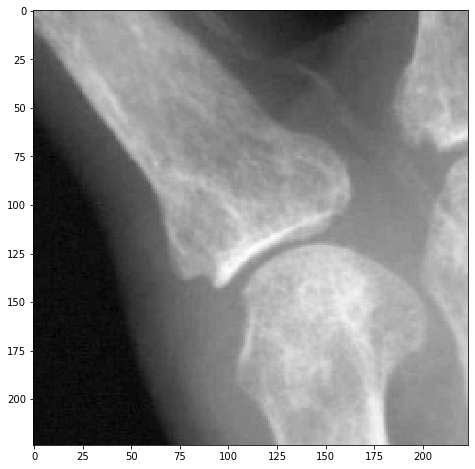

In [6]:
import matplotlib.pyplot as plt

for x, y in tf_val_dataset_v2.take(50):
    
    plt.figure(figsize = (8, 8))
    plt.imshow(y[:, :, 0], cmap="gray")
    plt.show()

In [6]:
from dataset.test_dataset import joint_test_dataset

val_dataset = joint_test_dataset(config, config.train_fixed_location)

tf_val_dataset, no_samples = val_dataset.get_feet_joint_test_dataset()

tf.Tensor(
[150.   1.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.], shape=(15,), dtype=float64)


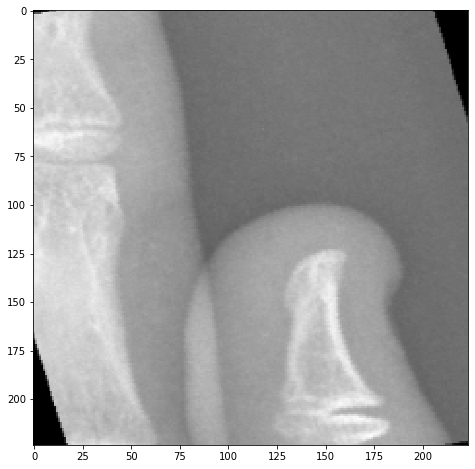

In [8]:
import matplotlib.pyplot as plt

for x, y in rsna_joint_dataset.take(1):
    print(y[0])
    
    plt.figure(figsize = (8, 8))
    plt.imshow(x[0, :, :, 0], cmap="gray")
    plt.show()

In [15]:
from dataset.test_dataset import joint_test_dataset

tf_val_wrists_dataset, _ = val_dataset.get_wrists_joint_test_dataset(outcomes_source = config.train_location + '/training.csv', erosion_flag = False)

In [8]:
from dataset.test_dataset import joint_test_dataset

val_dataset = joint_test_dataset(config, config.train_fixed_location)

tf_val_dataset, no_samples = val_dataset.get_hands_joint_test_dataset(outcomes_source = config.train_location + '/training.csv', erosion_flag = False)

In [9]:
import numpy as np

truths = np.array([], dtype = np.int32)

v1_preds = np.array([], dtype = np.int32)
v1_rmse_preds = np.array([], dtype = np.int32)

preds = np.array([], dtype = np.int32)
rmse_preds = np.array([], dtype = np.int32)

#feet_joints_val = feet_joints_val.unbatch()
# feet_joints_val = feet_joints_val.repeat(1)

for x, y in tf_val_dataset:
    y_pred = narrowing_model.predict(x) # tf.expand_dims(x, 0))
    
    rmse_pred = np.sum(y_pred * np.arange(5), axis = 1)
    
    y_pred = np.argmax(y_pred, axis = 1)
    
    y_old_pred = old_narrowing_model.predict(x)
    
    old_rmse_pred = np.sum(y_old_pred * np.arange(5), axis = 1)
    y_old_pred = np.argmax(y_old_pred, axis = 1)
    
    truths = np.append(truths, np.argmax(y, axis = 1))
    preds = np.append(preds, y_pred)
    rmse_preds = np.append(rmse_preds, rmse_pred)
    
    v1_preds = np.append(v1_preds, y_old_pred)
    v1_rmse_preds = np.append(v1_rmse_preds, old_rmse_pred)

In [11]:
for n in range(5):
    idx = np.where(truths == n)[0]
    
    print('SGD with weights: Class ', '\t', n, '\t', np.sqrt(np.mean(np.square(rmse_preds[idx] - truths[idx]))))
    print('V1: Class ', '\t', n, '\t', np.sqrt(np.mean(np.square(v1_rmse_preds[idx] - truths[idx]))))

SGD with weights: Class  	 0 	 0.5320002302011613
V1: Class  	 0 	 2.9937793110135753
SGD with weights: Class  	 1 	 0.7567278365106586
V1: Class  	 1 	 2.4782716309630737
SGD with weights: Class  	 2 	 0.8446537672712693
V1: Class  	 2 	 1.7620095339470907
SGD with weights: Class  	 3 	 1.1130998367358476
V1: Class  	 3 	 1.2552446615688966
SGD with weights: Class  	 4 	 1.3974921125234783
V1: Class  	 4 	 1.8443201535463978


In [81]:
print(np.sqrt(np.mean(np.square(preds - truths))))
print(np.sqrt(np.mean(np.square(v1_preds - truths))))

0.8400094892493688
0.7761153731654644


In [82]:
print(np.sqrt(np.mean(np.square(rmse_preds - truths))))
print(np.sqrt(np.mean(np.square(v1_rmse_preds - truths))))

0.7324008596641337
0.7353448826208382


In [84]:
idx = np.where(truths != 0)[0]

print(np.sqrt(np.mean(np.square(rmse_preds[idx] - truths[idx]))))
print(np.sqrt(np.mean(np.square(v1_rmse_preds[idx] - truths[idx]))))

1.2286015965086674
1.5663061455992022


In [85]:
idx = np.where(truths != 0)[0]

print(np.sqrt(np.mean(np.square(preds[idx] - truths[idx]))))
print(np.sqrt(np.mean(np.square(v1_preds[idx] - truths[idx]))))

1.5214515486254614
1.6859989894992797


In [86]:
from sklearn.metrics import classification_report

print(classification_report(truths, preds))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       996
           1       0.00      0.00      0.00         2
           2       0.24      0.57      0.34        46
           3       0.19      0.23      0.21        31
           4       0.61      0.59      0.60        29

    accuracy                           0.87      1104
   macro avg       0.40      0.46      0.42      1104
weighted avg       0.91      0.87      0.88      1104



/mnt/jw01-aruk-home01/projects/ra_challenge/tensorflow2.0_gpu/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
print(classification_report(truths, v1_preds))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       996
           1       0.00      0.00      0.00         2
           2       0.30      0.43      0.35        46
           3       0.29      0.23      0.25        31
           4       0.45      0.59      0.51        29

    accuracy                           0.89      1104
   macro avg       0.40      0.44      0.41      1104
weighted avg       0.90      0.89      0.90      1104



In [65]:
np.count_nonzero(truths == preds) / truths.size

0.865036231884058

In [66]:
np.sqrt(np.mean(np.square(truths - preds)))

0.8400094892493688

In [67]:
np.sqrt(np.mean(np.square(truths - rmse_preds)))

0.7324008596641337

In [68]:
abs_e = np.absolute(truths - preds)

np.unique(abs_e, return_counts = True)

(array([0, 1, 2, 3, 4]), array([955,  28,  83,  27,  11]))